In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from IPython.core.display import (
    HTML
)
from ipywidgets import (
    interact,
    widgets,
)
from sklearn import (
    datasets,
    set_config,
)
from sklearn.preprocessing import (
    scale, 
    minmax_scale, 
    power_transform,
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler,
    PowerTransformer,
)
from sklearn.feature_selection import (
    mutual_info_classif,
    mutual_info_regression,
)
from sklearn.pipeline import (
    Pipeline,
    make_pipeline
)
from sklearn.compose import (
    ColumnTransformer,
    make_column_transformer
)

In [2]:
class DataWrangling():
    def __init__(self) -> None:

        self.df1 = pd.DataFrame(
            {
                "key": ["K0", "K1", "K2", "K3"],
                "A": ["A0", "A1", "A2", "A3"],
                "B": ["B0", "B1", "B2", "B3"],
            }, index=range(4)
        )

        self.df2 = pd.DataFrame(
            {
                "key": ["K1", "K2", "K3", "K4"],
                "C": ["C1", "C2", "C3", "C4"],
                "D": ["D1", "D2", "D3", "D4"],
            }, index=range(1,5)
        )

        self.df3 = pd.DataFrame(
            {
                "key": ["K1", "K2", "K3", "K4"],
                "E": ["E1", "E2", "E3", "E4"],
                "F": ["F1", "F2", "F3", "F4"],
            }, index=range(1,5)
        )

        self.df = sns.load_dataset('tips')

        path_datatime = r'../../../../data/Airplane_Crashes_and_Fatalities_Since_1908.csv'

        self.df_datetime = pd.read_csv(
            filepath_or_buffer=path_datatime,
            usecols=['Date','Fatalities'], 
            parse_dates=['Date'],
            index_col='Date',
            decimal='.',
            sep=',',
        ).reset_index()

        path_titanic = r'../../../../data/titanic.csv'
        self.df_titanic = pd.read_csv(
            filepath_or_buffer=path_titanic,
            index_col='PassengerId',
            decimal='.',
            sep=',',
        )

    # Dataframes:
    def display_side_by_side(self, dataframes:list=[], titles:list=[]):
        html_str=''

        for df, title in zip(dataframes, titles):
            html_str += f'<span>{title}:</span>'
            html_str += (
                df.to_html()
                .replace('table','table style="display:inline"')
            )
            html_str+="&nbsp"*10

        display(HTML(html_str))

    def dataframes(self):
        self.display_side_by_side(
            dataframes=[self.df1, self.df2, self.df3, self.df.head(5), self.df_datetime.head(5), self.df_titanic.head(5)],
            titles=['df1','df2', 'df3', 'df', 'df_datatime', 'df_titanic']
        )

    def df_tips(self):
        df = self.df.head(8)

        display(df)

    def df_datetimes(self):
        df = self.df_datetime.head(8)

        display(df)

    def df_titanics(self):
        df = self.df_titanic.head(8)

        display(df)

    # Merges:
    def merge_inner(self):
        df = self.df1.merge(
            right=self.df2,
            how='inner',
            on='key',
        )

        display(df)

    def merge_left(self):
        df = self.df1.merge(
            right=self.df2,
            how='left',
            on='key',
        )

        display(df)

    def merge_right(self):
        df = self.df1.merge(
            right=self.df2,
            how='right',
            on='key',
        )

        display(df)
    
    def merge_todos_os_merges(self):
        method = ['inner', 'left', 'right', 'outer']
        
        @interact(method=method)
        def merge_dataframes(method):
            df = self.df2.merge(
                right=self.df3,
                how=method,
                on='key',
            )

            self.display_side_by_side(
                dataframes=[df],
                titles=[f'{method}']
            )

    # Concat:
    def concat_separando_exemplo_de_data_frame(self):
        self.df_a = self.df1.iloc[:2]
        self.df_b = self.df1.iloc[2:]
        
        self.display_side_by_side(
            dataframes=[self.df_a, self.df_b], 
            titles=['df_a','df_B']
        )

    def concat_concatenando_verticalmente(self):
        df = pd.concat([self.df_a, self.df_b])

        display(df)

    def concat_concatenando_horizontalmente(self):
        df = pd.concat([self.df_a, self.df_b], axis=1)

        display(df)

    def concat_concatenando_horizontalmente_forçando_o_mesmo_index(self):
        df = pd.concat(
            [self.df_a, self.df_b.reset_index()],
            axis=1
        )

        display(df)

    #Groupby:
    def groupby_agrupando_por_sexo(self):
        """Podemos agrupar por uma coluna e aplicar uma função em todas colunas (passíveis de aplicação da função)"""
        df = self.df.groupby(['sex']).mean()

        display(df)

    def groupby_agrupando_por_sexo_e_aplicar_a_coluna_total_bill(self):
        """Podemos agrupar por uma coluna e aplicar uma função em uma coluna/alvo retornando um pandas.Series"""
        df = self.df.groupby('sex')['total_bill'].mean()
        
        display(df)

    def groupby_agrupando_por_smoker_e_aplicar_a_coluna_total_bill(self):
        """Podemos agrupar por uma coluna e aplicar uma função em um coluna/alvo retornando um pandas.DataFrame (duplo "[[")"""
        df = self.df.groupby(['smoker'])[['total_bill']].sum()
        
        display(df)

    def groupby_agrupando_por_múltiplas_colunas(self):
        """Podemos agrupar por múltiplas colunas"""
        df = self.df.groupby(['time','day'])[['total_bill', 'tip']].agg(['mean', 'max','min', 'sum', 'count'])
        
        display(df)

    def groupby_agrupando_por_múltiplas_colunas_e_agregação(self):
        """Podemos aplicar múltiplas funções de agregação suportadas pelo pandas"""
        df = self.df.groupby(['time'])[['total_bill']].agg(['min','median','max'])
        
        display(df)

    def groupby_agrupando_por_time_e_aplicar_funções_customizadas_simples(self):
        """Podemos aplicar funções customizadas simples"""
        df = self.df.groupby(['time'])[['total_bill']].apply(lambda x: np.sum(x)+1)
        
        display(df)
    
    def groupby_agrupando_por_sexo_e_aplicar_funções_customizadas_complexas(self):
        """Podemos aplicar funções customizadas mais complexas."""

        def mean_diff(subdf):
            """Calcula a média do quanto cada gorjeta representou da conta total"""
            return np.mean( subdf['tip'] / subdf['total_bill'] )
        
    
        df = self.df.groupby('sex').apply(lambda x: str(round(mean_diff(x)*100, 2))+'%')

        display(df)
    
    # Transformation:
    def transformation_padronização_por_grupo(self):
        """Padronização por grupo"""
        df = self.df.groupby('sex')[['total_bill','tip']].transform(scale)
        
        display(df)

    def transformation_rolling_mean(self):
        """Rolling mean"""
        df = self.df.groupby('sex')[['total_bill','tip']].rolling(3).mean()
        
        display(df)

    def transformation_agrupando_por_fêmeas_que_fumam(self):
        groups = self.df.groupby(['sex','smoker'])
        df = groups.get_group(('Female','Yes'))

        display(df)

    def transformation_demonstração_gráfica(self):
        """Exemplo das mesmas informações com groupby e plot"""
        df = self.df

        # Groupby
        print(df.groupby(['tip','smoker']).tip.sum(), '\n')

        # Seaborn barplot
        sns.barplot(data=df, x='sex', y='tip', hue='smoker', order=['Female','Male'], hue_order=['No','Yes'], estimator=np.sum, ci=False)
        plt.grid(axis='y', alpha=.2)
        plt.show()

        # Plotly barplot
        px.bar(data_frame=df, x='sex', y='tip', color='smoker', barmode="group")

    # Groups:
    def groups_items_dos_grupos(self):
        df = self.df.groupby(['sex','smoker']).groups

        display(df)

    def groups_quantidade_de_grupos(self):
        df = self.df.groupby(['sex','smoker']).ngroups

        display(df)
    
    # Pivot:
    def pivot_estruturando_dados_por_sex_time_tip(self):
        """exemplo de pivot: sex / time / tip"""
        df = self.df.pivot_table(index='sex', columns='day', values='tip')
        
        display(df)

    def pivot_estruturando_dados_por_sex_time_total_bill_e_tip(self):
        """exemplo de pivot: sex / time / total_bill/tip"""
        df = self.df.pivot_table(index='sex', columns='time', values=['total_bill','tip'], aggfunc=['sum', 'mean'])
        
        display(df)

    def pivot_estruturando_dados_por_sex_time_e_day_total_bill_e_tip(self):
        """exemplo de pivot: sex / time/day / total_bill/tip"""
        df = self.df.pivot_table(index='sex', columns=['time','day'], values=['total_bill','tip'], aggfunc=np.median)
        
        display(df)

    def pivot_comparando_pivot_com_groupby(self):
        """Exemplo com groupby para comparação"""
        df = self.df.groupby(['sex','time','day'])[['total_bill','tip']].median()
        
        display(df)

    def pivot_com_múltiplas_funções_de_agregação(self):
        """Exemplo de pivot com múltiplas funções de agregação"""
        df = self.df.pivot_table(index='sex', columns='time', values='tip', aggfunc=['mean', np.median, np.std, lambda x: x.sum()])
        
        display(df)

    def pivot_especificando_funções_em_dicionário(self):
        """Exemplo de pivot especificando funções em dicionário"""

        agg_dict = {'tip': 'mean', 'total_bill':[np.median, 'min']}

        df = self.df.pivot_table(index='sex', columns='time', aggfunc=agg_dict)

    def pivot_outro(self):
        df = self.df.groupby(['day','time'])['tip'].mean()
        
        display(df)

    # Onehotencoder:
    def onehotencoder(self):
        self.encoder = OneHotEncoder(drop='if_binary')
        self.categorical_columns = self.df.select_dtypes(exclude='number').columns
        self.treinamento = self.encoder.fit(self.df[self.categorical_columns])
        display(self.encoder)

    def onehotencoder_dummies(self):
        df = pd.get_dummies(self.df)

        display(df)

    def onehotencoder_colunas_categorica(self):
        df = self.df.select_dtypes(exclude='number').columns
        
        display(df)

    def onehotencoder_colunas_númerica(self):
        df = self.df.select_dtypes(exclude='category').columns

        display(df)

    def onehotencoder_dummies_manual(self):
        df = self.encoder.transform(self.df[self.categorical_columns]).toarray()
        
        display(df)

    def onehotencoder_variaveis(self):
        dicionario = {
            'categories_' : self.treinamento.categories_,
            'drop_idx_' : self.treinamento.drop_idx_,
            'feature_names_in_' : self.treinamento.feature_names_in_,
            'get_feature_names_out' : self.treinamento.get_feature_names_out(),
        }

        for key, value in dicionario.items():
            print(f'{key}: {value}')


    def onehotencoder_dummies_manual_convertido_para_um_df(self):
        df = pd.DataFrame(
            data=self.encoder.transform(self.df[self.categorical_columns]).toarray(),
            columns=self.encoder.get_feature_names_out()
        )
        
        display(df)

    #Labelencoder:
    def labelencoder(self):
        df = self.df
        self.encoder = OrdinalEncoder()
        self.categorical_columns = df.select_dtypes(exclude='number').columns
        self.treinamento = self.encoder.fit(df[self.categorical_columns])
        display(self.encoder)


    def labelencoder_convertendo_para_categoria(self):
        df = self.df
        df[self.categorical_columns] = df[self.categorical_columns].astype('category')

        display(df.info())

    def labelencoder_verificando_como_ficaria_se_as_colunas_categoricas_virasem_números(self):
        df = {col: dict( enumerate(self.df[col].cat.categories) ) for col in self.categorical_columns}
        
        display(df)

    def labelencoder_transformando_colunas_categoricas_em_números(self):
        self.df_labelencoder = self.df
        self.df_labelencoder[self.categorical_columns] = (
            self.df_labelencoder[self.categorical_columns]
            .apply(lambda x: x.cat.codes)
        )
        
        display(self.df_labelencoder.head(8))

    def labelencoder_usando_o_factorize_para_ver_como_ficou_a_coluna_sex_após_a_transformação(self):
        df = self.df_labelencoder['sex'].factorize()

        display(df)
        
    def labelencoder_transformando_dados_esperados(self):
        df = self.df
        encoder = OrdinalEncoder()
        categorical_columns = df.select_dtypes(exclude='number').columns
        treinamento = encoder.fit(df[categorical_columns])

        # Mostrando atributos
        atributos = treinamento.categories_

        display(atributos)

        df[categorical_columns] = treinamento.transform(df[categorical_columns])

        display(df)

    # Filter:
    def filter_convencional(self):
        df = self.df[self.df.tip > 4].head()
        
        display(df)

    def filter_com_query(self):
        df = self.df.query('tip > 4').head()
        
        display(df)

    def filter_com_query_e_variável(self):
        minimo_aceitavel = 3
        df = self.df.query('tip>@minimo_aceitavel')
        
        display(df)

    def filter_múltiplos_filtros_convencionais(self):
        df = self.df[
            (self.df.tip > 2) &
            (self.df.total_bill < 20)
        ].head()
        
        display(df)
 
    def filter_dias_com_valores_unicos(self):
        df = self.df.day.unique()
        
        display(df)

    def filter_filtrando_pelos_valores_dentro_da_lista(self):
        df = self.df[
            self.df.day.isin(['Sat','Sun'])
        ].day.unique()
        
        display(df)
 
    def filter_múltiplos_filtros_com_query(self):
        df = self.df.query('tip>2 & total_bill<20').head()
        
        display(df)

    def filter_filtro_com_index(self):
        df = self.df.set_index('sex')
        
        display(df)

    def filter_filtrando_por_female_e_tip_e_total_bill(self):
        df = (
            self.df
            .set_index('sex')
        )

        df = df.loc[1, ['total_bill','tip']]
        
        display(df)
 
    def filter_filtrando_com_loc(self):
        df = self.df_datetime.loc['2000-05-10':'2010-05-10']
        
        display(df)

    def filter_resetando_index(self):
        df = self.df_datetime.reset_index()
        
        display(df)

    def filter_filtrando_com_filtro_convencional_de_coluna_between(self):
        df = self.df_datetime[
            self.df_datetime.Date.between('2000-05-10', '2010-05-10')
        ]
        
        display(df)

    def filter_filtrando_com_filtro_convencional_de_coluna_gt_lt(self):
        df = self.df_datetime[
            (self.df_datetime['Date']>='2000-05-10') & (self.df_datetime['Date'].le('2010-05-10'))
        ]
        
        display(df)

    # Feature Engineering:
    def feature_engineering_normalized_df_tips(self):
        df = self.df
        df['tip_normalized'] = df['tip'] / df['total_bill']
        
        display(df)

    def feature_engineering_extraído_names(self):
        df = self.df_titanic.Name.str.extract('.+?, (.+?)\.', expand=False)
        
        display(df)

    def feature_engineering_extraído_names_e_criando_a_coluna_personal_title(self):
        """ '.+?, (.+?)\.' > padrão no texto, depois da virgula e antes do ponto"""
        df = self.df_titanic
        df['personal_title'] = df.Name.str.extract('.+?, (.+?)\.', expand=False)
        
        display(df.head(5))

    # Selecionando features:
    def selecionando_features_observando_diferenças_nas_distribuições(self):
        df = self.df_titanic
        sns.boxplot(data=df, x='Survived', y='Pclass')

    def selecionando_features_observando_correlação(self):
        """Observando correlação (linear)"""

        df = self.df_titanic

        sns.heatmap(df.corr(), cmap='RdBu_r', center=0, annot=True);
    
    # Mutual information:
    def mutual_information_drop_columns_and_nas(self):
        self.df_model = self.df_titanic.drop(columns=['Name','Ticket','Cabin']).dropna()
        
        display(self.df_model.head(5))

    def mutual_information_criação_do_model(self):
        df = self.df_model

        self.target = df['Survived']
        self.df_features = df.drop(columns='Survived')
        cat_features = self.df_features.select_dtypes(exclude='number').columns

        encoder = OrdinalEncoder()
        self.df_features[cat_features] = (
            encoder.fit_transform(self.df_features[cat_features])
            .astype(int)
        )

        display(self.df_features.head())

    def mutual_information_discrete_features(self):
        self.discrete_features = self.df_features.dtypes==int
        
        display(self.discrete_features)

    def mutual_information_gráfico_de_barras(self):
        scores = mutual_info_classif(
            X=self.df_features,
            y=self.target,
            discrete_features=self.discrete_features
        )

        display(scores)

        pd.Series(
            data=scores,
            index=self.df_features.columns            
        ).sort_values().plot.barh()

    # Pipelines: 
    def pipelines_criando(self):
        df = self.df_titanic
        set_config(display="diagram")

        df['personal_titles'] = df.Name.str.extract('.*, (.+?)\.', expand=False)
        df = df.drop(columns=['Name','Ticket','Cabin']).dropna()

        self.df_features = df.drop(columns='Survived')
        target = df['Survived']

        display(self.df_features.head())

    def pipelines_selecionando_features_numéricas_e_categóricas(self):
        """Selecionando features numéricas e categóricas"""
        self.numerical_features = self.df_features.select_dtypes('number').columns
        self.categorical_features = self.df_features.select_dtypes(exclude='number').columns

        print(self.numerical_features)
        print(self.categorical_features)

    def pipelines_aplicando_column_transformer(self):
        self.preprocessing_pipeline = make_column_transformer(
            [StandardScaler(), self.numerical_features],
            [OneHotEncoder(), self.categorical_features]
        )

        display(self.preprocessing_pipeline)

    def pipelines_treinamento(self):
        df = self.preprocessing_pipeline.fit(self.df_features)

        display(df)
        
    def pipelines_colocando_resultado_em_dataframe(self):
        df = pd.DataFrame(
            data=self.preprocessing_pipeline.transform(self.df_features).toarray(),
            columns=self.preprocessing_pipeline.get_feature_names_out()
        )

        display(df.head())

    def pipelines_múltiplos_processamentos_no_column_transformer(self):
        # Múltiplos processamentos no column transformer
        # Aplicando column transformer
        self.preprocessing_pipeline = make_column_transformer(
            [make_pipeline(PowerTransformer(), StandardScaler()), self.numerical_features],
            [OneHotEncoder(), self.categorical_features]
        )

        self.preprocessing_pipeline.fit(self.df_features)
        display(self.preprocessing_pipeline)




if __name__ == '__main__':
    data_wrangling = DataWrangling()

# Dataframes:

In [3]:
data_wrangling.dataframes()

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3
,key,C,D
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3
4,K4,C4,D4
,key,E,F


# Merges:

In [4]:
data_wrangling.merge_inner()

,key,A,B,C,D
0,K1,A1,B1,C1,D1
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


In [5]:
data_wrangling.merge_left()

,key,A,B,C,D
0,K0,A0,B0,NaN,NaN
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [6]:
data_wrangling.merge_right()

,key,A,B,C,D
0,K1,A1,B1,C1,D1
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3
3,K4,NaN,NaN,C4,D4


In [7]:
data_wrangling.merge_todos_os_merges()

interactive(children=(Dropdown(description='method', options=('inner', 'left', 'right', 'outer'), value='inner…

# Concatenando:

In [8]:
data_wrangling.concat_separando_exemplo_de_data_frame()

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
,key,A,B
2,K2,A2,B2
3,K3,A3,B3


In [9]:
data_wrangling.concat_concatenando_verticalmente()

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [10]:
data_wrangling.concat_concatenando_horizontalmente()

,key,A,B,key,A,B
0,K0,A0,B0,NaN,NaN,NaN
1,K1,A1,B1,NaN,NaN,NaN
2,NaN,NaN,NaN,K2,A2,B2
3,NaN,NaN,NaN,K3,A3,B3


In [11]:
data_wrangling.concat_concatenando_horizontalmente_forçando_o_mesmo_index()

,key,A,B,index,key,A,B
0,K0,A0,B0,2,K2,A2,B2
1,K1,A1,B1,3,K3,A3,B3


# Group By:

In [12]:
data_wrangling.groupby_agrupando_por_sexo()

,total_bill,tip,size
sex,,,
Male,20.744076,3.089618,2.630573
Female,18.056897,2.833448,2.459770


In [13]:
data_wrangling.groupby_agrupando_por_sexo_e_aplicar_a_coluna_total_bill()

sex
Male      20.744076
Female    18.056897
Name: total_bill, dtype: float64

In [14]:
data_wrangling.groupby_agrupando_por_smoker_e_aplicar_a_coluna_total_bill()

,total_bill
smoker,
Yes,1930.34
No,2897.43


In [15]:
data_wrangling.groupby_agrupando_por_múltiplas_colunas()

total_bill                                    tip               \
                  mean    max    min      sum count      mean    max   min   
time   day                                                                   
Lunch  Thur  17.664754  43.11   7.51  1077.55    61  2.767705   6.70  1.25   
       Fri   12.845714  16.27   8.58    89.92     7  2.382857   3.48  1.58   
       Sat         NaN    NaN    NaN     0.00     0       NaN    NaN   NaN   
       Sun         NaN    NaN    NaN     0.00     0       NaN    NaN   NaN   
Dinner Thur  18.780000  18.78  18.78    18.78     1  3.000000   3.00  3.00   
       Fri   19.663333  40.17   5.75   235.96    12  2.940000   4.73  1.00   
       Sat   20.441379  50.81   3.07  1778.40    87  2.993103  10.00  1.00   
       Sun   21.410000  48.17   7.25  1627.16    76  3.255132   6.50  1.01   

                           
                sum count  
time   day                 
Lunch  Thur  168.83    61  
       Fri    16.68     7  
       Sat     0.00     0  
       Sun     0.00     0  
Dinner Thur    3.00     1  
       Fri    35.28    12  
       Sat   260.40    87  
       Sun   247.39    76

In [16]:
data_wrangling.groupby_agrupando_por_múltiplas_colunas_e_agregação()

total_bill               
              min  median    max
time                            
Lunch        7.51  15.965  43.11
Dinner       3.07  18.390  50.81

In [17]:
data_wrangling.groupby_agrupando_por_time_e_aplicar_funções_customizadas_simples()

,total_bill
time,
Lunch,1168.47
Dinner,3661.30


In [18]:
data_wrangling.groupby_agrupando_por_sexo_e_aplicar_funções_customizadas_complexas()

sex
Male      15.77%
Female    16.65%
dtype: object

# Tranformação:

In [19]:
data_wrangling.df_tips()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4


In [20]:
data_wrangling.transformation_padronização_por_grupo()

,total_bill,tip
0,-0.133981,-1.581740
1,-1.128795,-0.963126
2,0.028852,0.276472
3,0.318534,0.148470
4,0.820428,0.673616
...,...,...
239,0.898985,1.906813
240,1.145680,-0.722970
241,0.208954,-0.734070
242,-0.317249,-0.902493


In [21]:
data_wrangling.transformation_rolling_mean()

total_bill       tip
sex                             
Male   1           NaN       NaN
       2           NaN       NaN
       3     18.343333  2.823333
       5     23.326667  3.840000
       6     19.246667  3.340000
...                ...       ...
Female 226   14.113333  2.500000
       229   16.160000  2.460000
       238   22.680000  3.183333
       240   28.376667  3.183333
       243   27.263333  3.223333

[244 rows x 2 columns]

In [22]:
data_wrangling.transformation_agrupando_por_fêmeas_que_fumam()

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.00,Female,Yes,Sat,Dinner,1
72,26.86,3.14,Female,Yes,Sat,Dinner,2
73,25.28,5.00,Female,Yes,Sat,Dinner,2
92,5.75,1.00,Female,Yes,Fri,Dinner,2
93,16.32,4.30,Female,Yes,Fri,Dinner,2
100,11.35,2.50,Female,Yes,Fri,Dinner,2
101,15.38,3.00,Female,Yes,Fri,Dinner,2
102,44.30,2.50,Female,Yes,Sat,Dinner,3
103,22.42,3.48,Female,Yes,Sat,Dinner,2
109,14.31,4.00,Female,Yes,Sat,Dinner,2


tip    smoker
1.00   Yes        3.00
       No         1.00
1.01   Yes        0.00
       No         1.01
1.10   Yes        1.10
                 ...  
7.58   No         7.58
9.00   Yes        0.00
       No         9.00
10.00  Yes       10.00
       No         0.00
Name: tip, Length: 246, dtype: float64 



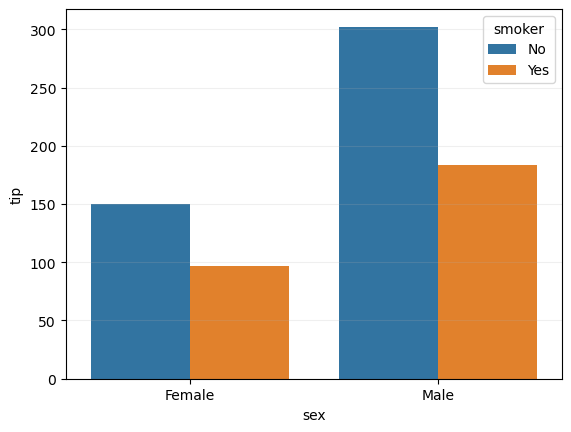

In [23]:
data_wrangling.transformation_demonstração_gráfica()

# Grupos:

In [24]:
data_wrangling.df_tips()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4


In [25]:
data_wrangling.groups_items_dos_grupos()

{('Female', 'No'): [0, 4, 11, 14, 16, 18, 21, 22, 29, 32, 33, 37, 51, 52, 57, 66, 71, 74, 82, 85, 94, 104, 111, 114, 115, 117, 118, 119, 121, 124, 125, 127, 128, 131, 132, 133, 134, 135, 136, 137, 139, 140, 143, 144, 145, 146, 147, 155, 157, 158, 162, 223, 238, 243], ('Female', 'Yes'): [67, 72, 73, 92, 93, 100, 101, 102, 103, 109, 164, 168, 169, 178, 186, 188, 191, 197, 198, 201, 202, 203, 205, 209, 213, 214, 215, 219, 221, 225, 226, 229, 240], ('Male', 'No'): [1, 2, 3, 5, 6, 7, 8, 9, 10, 12, 13, 15, 17, 19, 20, 23, 24, 25, 26, 27, 28, 30, 31, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 53, 54, 55, 59, 64, 65, 68, 70, 75, 77, 78, 79, 81, 84, 86, 87, 88, 89, 91, 99, 108, 110, 112, 113, 116, 120, 122, 123, 126, 129, 130, 141, 142, 148, 149, 150, 151, 152, 153, 154, 156, 159, 160, 161, 163, 165, 166, 167, 185, 195, 212, 227, 228, 232, 233, 235, 239, 242], ('Male', 'Yes'): [56, 58, 60, 61, 62, 63, 69, 76, 80, 83, 90, 95, 96, 97, 98, 105, 106, 107, 138, 170, 171, 172, 17

In [26]:
data_wrangling.groups_quantidade_de_grupos()

4

# Pivot Table:

In [27]:
data_wrangling.df_tips()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4


In [28]:
data_wrangling.pivot_estruturando_dados_por_sex_time_tip()

day,Thur,Fri,Sat,Sun
sex,,,,
Male,2.980333,2.693000,3.083898,3.220345
Female,2.575625,2.781111,2.801786,3.367222


In [29]:
data_wrangling.pivot_estruturando_dados_por_sex_time_total_bill_e_tip()

sum                                  mean                       \
          tip         total_bill                tip           total_bill   
time    Lunch  Dinner      Lunch   Dinner     Lunch    Dinner      Lunch   
sex                                                                        
Male    95.11  389.96     595.60  2661.22  2.882121  3.144839  18.048485   
Female  90.40  156.11     571.87   999.08  2.582857  3.002115  16.339143   

                   
                   
time       Dinner  
sex                
Male    21.461452  
Female  19.213077

In [30]:
data_wrangling.pivot_estruturando_dados_por_sex_time_e_day_total_bill_e_tip()

tip                                 total_bill                       \
time   Lunch       Dinner                         Lunch        Dinner          
day     Thur   Fri   Thur  Fri    Sat    Sun       Thur    Fri   Thur    Fri   
sex                                                                            
Male    2.53  1.92    NaN  3.0  3.000  3.085     16.975  12.16    NaN  22.49   
Female  2.00  2.75    3.0  3.0  2.625  3.500     13.420  14.70  18.78  15.38   

                       
time                   
day       Sat     Sun  
sex                    
Male    18.24  20.725  
Female  18.36  17.410

In [31]:
data_wrangling.pivot_comparando_pivot_com_groupby()

total_bill    tip
sex    time   day                    
Male   Lunch  Thur      16.975  2.530
              Fri       12.160  1.920
              Sat          NaN    NaN
              Sun          NaN    NaN
       Dinner Thur         NaN    NaN
              Fri       22.490  3.000
              Sat       18.240  3.000
              Sun       20.725  3.085
Female Lunch  Thur      13.420  2.000
              Fri       14.700  2.750
              Sat          NaN    NaN
              Sun          NaN    NaN
       Dinner Thur      18.780  3.000
              Fri       15.380  3.000
              Sat       18.360  2.625
              Sun       17.410  3.500

In [32]:
data_wrangling.pivot_com_múltiplas_funções_de_agregação()

mean           median              std           <lambda>        
time       Lunch    Dinner  Lunch Dinner     Lunch    Dinner    Lunch  Dinner
sex                                                                          
Male    2.882121  3.144839   2.31    3.0  1.329017  1.529116    95.11  389.96
Female  2.582857  3.002115   2.01    3.0  1.075108  1.193483    90.40  156.11

In [33]:
data_wrangling.pivot_especificando_funções_em_dicionário()

In [34]:
data_wrangling.pivot_outro()

day   time  
Thur  Lunch     2.767705
      Dinner    3.000000
Fri   Lunch     2.382857
      Dinner    2.940000
Sat   Lunch          NaN
      Dinner    2.993103
Sun   Lunch          NaN
      Dinner    3.255132
Name: tip, dtype: float64

# Onehotencoder:

In [35]:
data_wrangling.df_tips()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4


In [36]:
data_wrangling.onehotencoder()

OneHotEncoder(drop='if_binary')

In [37]:
data_wrangling.onehotencoder_dummies()

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,1,0,0,1,0,0,1,0,0,1
240,27.18,2.00,2,0,1,1,0,0,0,1,0,0,1
241,22.67,2.00,2,1,0,1,0,0,0,1,0,0,1
242,17.82,1.75,2,1,0,0,1,0,0,1,0,0,1


In [38]:
data_wrangling.onehotencoder_colunas_categorica()

Index(['sex', 'smoker', 'day', 'time'], dtype='object')

In [39]:
data_wrangling.onehotencoder_colunas_númerica()

Index(['total_bill', 'tip', 'size'], dtype='object')

In [40]:
data_wrangling.onehotencoder_dummies_manual()

array([[0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [41]:
data_wrangling.onehotencoder_variaveis()

categories_: [array(['Female', 'Male'], dtype=object), array(['No', 'Yes'], dtype=object), array(['Fri', 'Sat', 'Sun', 'Thur'], dtype=object), array(['Dinner', 'Lunch'], dtype=object)]
drop_idx_: [0 0 None 0]
feature_names_in_: ['sex' 'smoker' 'day' 'time']
get_feature_names_out: ['sex_Male' 'smoker_Yes' 'day_Fri' 'day_Sat' 'day_Sun' 'day_Thur'
 'time_Lunch']


In [42]:
data_wrangling.onehotencoder_dummies_manual_convertido_para_um_df()

,sex_Male,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Lunch
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
239,1.0,0.0,0.0,1.0,0.0,0.0,0.0
240,0.0,1.0,0.0,1.0,0.0,0.0,0.0
241,1.0,1.0,0.0,1.0,0.0,0.0,0.0
242,1.0,0.0,0.0,1.0,0.0,0.0,0.0


# LabelEncoder / OrdinalEncoder:

In [43]:
data_wrangling.df_tips()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4


In [44]:
data_wrangling.labelencoder()

OrdinalEncoder()

In [45]:
data_wrangling.labelencoder_convertendo_para_categoria()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


None

In [46]:
data_wrangling.labelencoder_verificando_como_ficaria_se_as_colunas_categoricas_virasem_números()

{'sex': {0: 'Male', 1: 'Female'},
 'smoker': {0: 'Yes', 1: 'No'},
 'day': {0: 'Thur', 1: 'Fri', 2: 'Sat', 3: 'Sun'},
 'time': {0: 'Lunch', 1: 'Dinner'}}

In [47]:
data_wrangling.labelencoder_transformando_colunas_categoricas_em_números()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,1,1,3,1,2
1,10.34,1.66,0,1,3,1,3
2,21.01,3.50,0,1,3,1,3
3,23.68,3.31,0,1,3,1,2
4,24.59,3.61,1,1,3,1,4
5,25.29,4.71,0,1,3,1,4
6,8.77,2.00,0,1,3,1,2
7,26.88,3.12,0,1,3,1,4


In [48]:
data_wrangling.labelencoder_usando_o_factorize_para_ver_como_ficou_a_coluna_sex_após_a_transformação()

(array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
        0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
        1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
        0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
        1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
        1, 0]),
 Int64Index([1, 0], dtype='int64'))

In [49]:
data_wrangling.labelencoder_transformando_dados_esperados()

[]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,1,1,3,1,2
1,10.34,1.66,0,1,3,1,3
2,21.01,3.50,0,1,3,1,3
3,23.68,3.31,0,1,3,1,2
4,24.59,3.61,1,1,3,1,4
...,...,...,...,...,...,...,...
239,29.03,5.92,0,1,2,1,3
240,27.18,2.00,1,0,2,1,2
241,22.67,2.00,0,0,2,1,2
242,17.82,1.75,0,1,2,1,2


# Filter:

In [50]:
data_wrangling.df_datetimes()

,Date,Fatalities
0,1908-09-17,1.0
1,1912-07-12,5.0
2,1913-08-06,1.0
3,1913-09-09,14.0
4,1913-10-17,30.0
5,1915-03-05,21.0
6,1915-09-03,19.0
7,1916-07-28,20.0


In [51]:
data_wrangling.filter_convencional()

,total_bill,tip,sex,smoker,day,time,size
5,25.29,4.71,0,1,3,1,4
11,35.26,5.00,1,1,3,1,4
20,17.92,4.08,0,1,2,1,2
23,39.42,7.58,0,1,2,1,4
28,21.70,4.30,0,1,2,1,2


In [52]:
data_wrangling.filter_com_query()

,total_bill,tip,sex,smoker,day,time,size
5,25.29,4.71,0,1,3,1,4
11,35.26,5.00,1,1,3,1,4
20,17.92,4.08,0,1,2,1,2
23,39.42,7.58,0,1,2,1,4
28,21.70,4.30,0,1,2,1,2


In [53]:
data_wrangling.filter_com_query_e_variável()

,total_bill,tip,sex,smoker,day,time,size
2,21.01,3.50,0,1,3,1,3
3,23.68,3.31,0,1,3,1,2
4,24.59,3.61,1,1,3,1,4
5,25.29,4.71,0,1,3,1,4
7,26.88,3.12,0,1,3,1,4
...,...,...,...,...,...,...,...
219,30.14,3.09,1,0,2,1,4
221,13.42,3.48,1,0,1,0,2
232,11.61,3.39,0,1,2,1,2
238,35.83,4.67,1,1,2,1,3


In [54]:
data_wrangling.filter_múltiplos_filtros_convencionais()

,total_bill,tip,sex,smoker,day,time,size
9,14.78,3.23,0,1,3,1,2
13,18.43,3.00,0,1,3,1,4
14,14.83,3.02,1,1,3,1,2
17,16.29,3.71,0,1,3,1,3
18,16.97,3.50,1,1,3,1,3


In [55]:
data_wrangling.filter_dias_com_valores_unicos()

array([3, 2, 0, 1], dtype=int8)

In [56]:
data_wrangling.filter_filtrando_pelos_valores_dentro_da_lista()

array([], dtype=int8)

In [57]:
data_wrangling.filter_múltiplos_filtros_com_query()

,total_bill,tip,sex,smoker,day,time,size
9,14.78,3.23,0,1,3,1,2
13,18.43,3.00,0,1,3,1,4
14,14.83,3.02,1,1,3,1,2
17,16.29,3.71,0,1,3,1,3
18,16.97,3.50,1,1,3,1,3


In [58]:
data_wrangling.filter_filtro_com_index()

,total_bill,tip,smoker,day,time,size
sex,,,,,,
1,16.99,1.01,1,3,1,2
0,10.34,1.66,1,3,1,3
0,21.01,3.50,1,3,1,3
0,23.68,3.31,1,3,1,2
1,24.59,3.61,1,3,1,4
...,...,...,...,...,...,...
0,29.03,5.92,1,2,1,3
1,27.18,2.00,0,2,1,2
0,22.67,2.00,0,2,1,2


In [59]:
data_wrangling.filter_filtrando_por_female_e_tip_e_total_bill()

,total_bill,tip
sex,,
1,16.99,1.01
1,24.59,3.61
1,35.26,5.00
1,14.83,3.02
1,10.33,1.67
...,...,...
1,10.09,2.00
1,22.12,2.88
1,35.83,4.67


In [60]:
data_wrangling.filter_resetando_index()

,index,Date,Fatalities
0,0,1908-09-17,1.0
1,1,1912-07-12,5.0
2,2,1913-08-06,1.0
3,3,1913-09-09,14.0
4,4,1913-10-17,30.0
...,...,...,...
5263,5263,2009-05-20,98.0
5264,5264,2009-05-26,4.0
5265,5265,2009-06-01,228.0
5266,5266,2009-06-07,1.0


In [61]:
data_wrangling.df_datetimes()

,Date,Fatalities
0,1908-09-17,1.0
1,1912-07-12,5.0
2,1913-08-06,1.0
3,1913-09-09,14.0
4,1913-10-17,30.0
5,1915-03-05,21.0
6,1915-09-03,19.0
7,1916-07-28,20.0


In [62]:
data_wrangling.filter_filtrando_com_filtro_convencional_de_coluna_between()

,Date,Fatalities
4587,2001-01-08,9.0
4669,2001-01-04,16.0
4696,2000-07-02,14.0
4709,2000-06-23,3.0
4714,2000-05-10,6.0
...,...,...
5263,2009-05-20,98.0
5264,2009-05-26,4.0
5265,2009-06-01,228.0
5266,2009-06-07,1.0


In [63]:
data_wrangling.filter_filtrando_com_filtro_convencional_de_coluna_gt_lt()

,Date,Fatalities
4587,2001-01-08,9.0
4669,2001-01-04,16.0
4696,2000-07-02,14.0
4709,2000-06-23,3.0
4714,2000-05-10,6.0
...,...,...
5263,2009-05-20,98.0
5264,2009-05-26,4.0
5265,2009-06-01,228.0
5266,2009-06-07,1.0


# Enriquecimento (Feature Engineering):

Feature engineering, ou enriquecimento, consiste em uma das etapas mais importantes para construir bons modelos de machine learning.

O objetivo da feature engineering é tornar os dados melhor aproveitáveis para resolver o problema proposto. Através da feature engineering, podemos:

- Melhor a performance preditiva do modelo
- Reduzir custos computacionais ou necessidades de dados
- Aumentar a interpretabilidade dos resultados

Novas features podem ser geradas a partir das próprias features do datataset através de operações aritméticas simples. Conside por exemplo o dataset de gorjetas previamente estudado: 

In [64]:
data_wrangling.df_tips()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,1,1,3,1,2
1,10.34,1.66,0,1,3,1,3
2,21.01,3.50,0,1,3,1,3
3,23.68,3.31,0,1,3,1,2
4,24.59,3.61,1,1,3,1,4
5,25.29,4.71,0,1,3,1,4
6,8.77,2.00,0,1,3,1,2
7,26.88,3.12,0,1,3,1,4


Neste caso, poderíamos adicionar uma coluna que representa o quanto a gorjeta representa da conta total, ou o valor da conta divido pelo tamanho da mesa (size):

In [65]:
data_wrangling.feature_engineering_normalized_df_tips()

,total_bill,tip,sex,smoker,day,time,size,tip_normalized
0,16.99,1.01,1,1,3,1,2,0.059447
1,10.34,1.66,0,1,3,1,3,0.160542
2,21.01,3.50,0,1,3,1,3,0.166587
3,23.68,3.31,0,1,3,1,2,0.139780
4,24.59,3.61,1,1,3,1,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,0,1,2,1,3,0.203927
240,27.18,2.00,1,0,2,1,2,0.073584
241,22.67,2.00,0,0,2,1,2,0.088222
242,17.82,1.75,0,1,2,1,2,0.098204


Lembre-se, contudo, que para um modelo supervisionado de machine learning, todas as features trabalhadas no treino devem ser possíveis de serem utilizada em novos dados que virão também, como input do modelo.

Outra maneira de adicionar colunas consiste em capturar categorias mais específicas em uma variável categórica com texto. 

Por exemplo, considere a base de dados do Titanic:

In [66]:
data_wrangling.df_titanics()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


Nesta base, o nome do completo do passageiro não seria útil, visto que são nomes únicos. Contudo, há um tratamento pessoal em cada nome (como Mr., Mrs.) e isso poderia contribuir para melhor performance do modelo.

In [67]:
data_wrangling.feature_engineering_extraído_names()

PassengerId
1        Mr
2       Mrs
3      Miss
4       Mrs
5        Mr
       ... 
887     Rev
888    Miss
889    Miss
890      Mr
891      Mr
Name: Name, Length: 891, dtype: object

In [68]:
data_wrangling.feature_engineering_extraído_names_e_criando_a_coluna_personal_title()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,personal_title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


# Selecionando features:

A parte de seleção de features também é muito importante e o domínio de negócio/área conta muito aqui.

### Análise gráfica

In [69]:
data_wrangling.df_titanics()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,personal_title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master


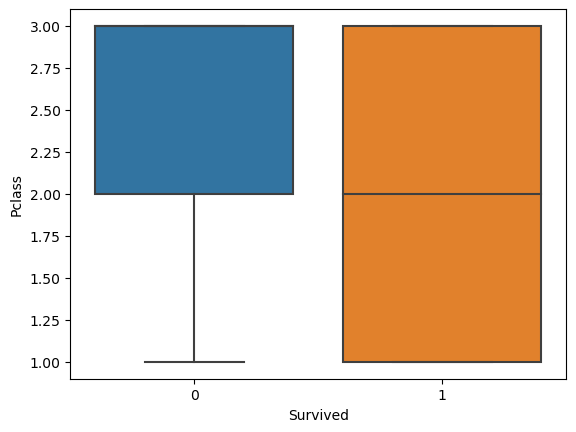

In [70]:
data_wrangling.selecionando_features_observando_diferenças_nas_distribuições()

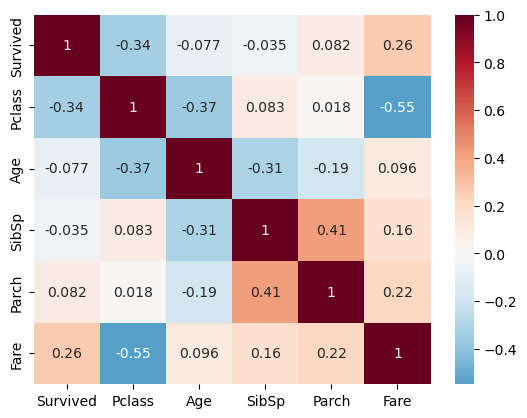

In [71]:
data_wrangling.selecionando_features_observando_correlação()

# Mutual information:

In [72]:
data_wrangling.df_titanics()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,personal_title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master


In [73]:
data_wrangling.mutual_information_drop_columns_and_nas()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,personal_title
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,Mr
2,1,1,female,38.0,1,0,71.2833,C,Mrs
3,1,3,female,26.0,0,0,7.9250,S,Miss
4,1,1,female,35.0,1,0,53.1000,S,Mrs
5,0,3,male,35.0,0,0,8.0500,S,Mr


In [74]:
data_wrangling.mutual_information_criação_do_model()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,personal_title
PassengerId,,,,,,,,
1,3,1,22.0,1,0,7.2500,2,11
2,1,0,38.0,1,0,71.2833,0,12
3,3,0,26.0,0,0,7.9250,2,8
4,1,0,35.0,1,0,53.1000,2,12
5,3,1,35.0,0,0,8.0500,2,11


In [75]:
data_wrangling.mutual_information_discrete_features()

Pclass             True
Sex                True
Age               False
SibSp              True
Parch              True
Fare              False
Embarked           True
personal_title     True
dtype: bool

array([0.06516276, 0.14840857, 0.00198727, 0.01723787, 0.02126715,
       0.13547646, 0.01930984, 0.17785974])

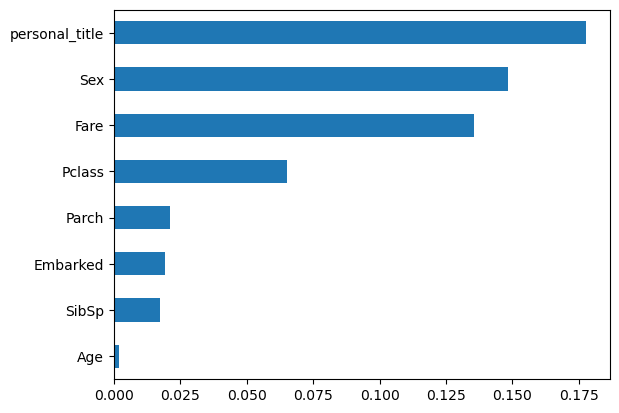

In [76]:
data_wrangling.mutual_information_gráfico_de_barras()

**Observação:** MI, assim como correlação, é uma métrica **univariada**, portanto, não necessariamente uma variável com baixo score de MI vai ter pouca importância para o modelo, pois pode ser que, quando associada à outra variável, ambas variáveis contribuam para o modelo.

# Pipelines:

In [77]:
data_wrangling.pipelines_criando()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,personal_title,personal_titles
PassengerId,,,,,,,,,
1,3,male,22.0,1,0,7.2500,S,Mr,Mr
2,1,female,38.0,1,0,71.2833,C,Mrs,Mrs
3,3,female,26.0,0,0,7.9250,S,Miss,Miss
4,1,female,35.0,1,0,53.1000,S,Mrs,Mrs
5,3,male,35.0,0,0,8.0500,S,Mr,Mr


In [78]:
data_wrangling.pipelines_selecionando_features_numéricas_e_categóricas()

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
Index(['Sex', 'Embarked', 'personal_title', 'personal_titles'], dtype='object')


In [79]:
data_wrangling.pipelines_selecionando_features_numéricas_e_categóricas()

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
Index(['Sex', 'Embarked', 'personal_title', 'personal_titles'], dtype='object')


In [80]:
data_wrangling.pipelines_aplicando_column_transformer()

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
                                ('onehotencoder', OneHotEncoder(),
                                 Index(['Sex', 'Embarked', 'personal_title', 'personal_titles'], dtype='object'))])

In [81]:
data_wrangling.pipelines_treinamento()

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
                                ('onehotencoder', OneHotEncoder(),
                                 Index(['Sex', 'Embarked', 'personal_title', 'personal_titles'], dtype='object'))])

In [82]:
data_wrangling.pipelines_colocando_resultado_em_dataframe()

,standardscaler__Pclass,standardscaler__Age,standardscaler__SibSp,standardscaler__Parch,standardscaler__Fare,onehotencoder__Sex_female,onehotencoder__Sex_male,onehotencoder__Embarked_C,onehotencoder__Embarked_Q,onehotencoder__Embarked_S,...,onehotencoder__personal_titles_Master,onehotencoder__personal_titles_Miss,onehotencoder__personal_titles_Mlle,onehotencoder__personal_titles_Mme,onehotencoder__personal_titles_Mr,onehotencoder__personal_titles_Mrs,onehotencoder__personal_titles_Ms,onehotencoder__personal_titles_Rev,onehotencoder__personal_titles_Sir,onehotencoder__personal_titles_the Countess
0,0.908600,-0.527669,0.522511,-0.506787,-0.516380,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-1.482983,0.577094,0.522511,-0.506787,0.694046,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.908600,-0.251478,-0.552714,-0.506787,-0.503620,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.482983,0.369951,0.522511,-0.506787,0.350326,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.908600,0.369951,-0.552714,-0.506787,-0.501257,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [83]:
data_wrangling.pipelines_múltiplos_processamentos_no_column_transformer()

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('powertransformer',
                                                  PowerTransformer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
                                ('onehotencoder', OneHotEncoder(),
                                 Index(['Sex', 'Embarked', 'personal_title', 'personal_titles'], dtype='object'))])

In [84]:
data_wrangling.pipelines_colocando_resultado_em_dataframe()

,pipeline__Pclass,pipeline__Age,pipeline__SibSp,pipeline__Parch,pipeline__Fare,onehotencoder__Sex_female,onehotencoder__Sex_male,onehotencoder__Embarked_C,onehotencoder__Embarked_Q,onehotencoder__Embarked_S,...,onehotencoder__personal_titles_Master,onehotencoder__personal_titles_Miss,onehotencoder__personal_titles_Mlle,onehotencoder__personal_titles_Mme,onehotencoder__personal_titles_Mr,onehotencoder__personal_titles_Mrs,onehotencoder__personal_titles_Ms,onehotencoder__personal_titles_Rev,onehotencoder__personal_titles_Sir,onehotencoder__personal_titles_the Countess
0,0.940654,-0.469528,1.290366,-0.609138,-0.997650,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-1.409998,0.609720,1.290366,-0.609138,1.287757,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.940654,-0.186239,-0.716478,-0.609138,-0.901073,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.409998,0.417070,1.290366,-0.609138,1.024276,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.940654,0.417070,-0.716478,-0.609138,-0.884112,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# Conclusão do módulo:

Neste módulo, vocês aprenderam:

- Como identificar e lidar com valores duplicados
- Como identificar e lidar com valores faltantes
- Como identificar e lidar com outliers
- Como identificar e lidar com dados inconsistentes através de análise univariada
- Como identificar variáveis potencialmente importantes para o modelo através da análise multivariada
- Como transformar seus dados numéricos e categóricos para aplicação do modelo
- Como estruturar os seus dados
- Como criar novas variáveis para o modelo
- Como estruturar um pipeline de pré-tratamento dos dados